In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df = pd.read_csv("D:\harshit python\deep learning\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop("customerID",axis=1,inplace =True)


In [8]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [10]:
df.drop(df[df["TotalCharges"]==" "].index,axis=0,inplace=True)

In [11]:
df.shape

(7032, 20)

In [12]:
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

Text(0, 0.5, 'no of customers')

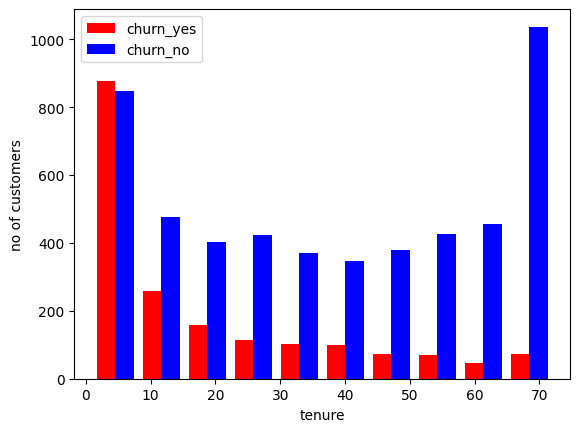

In [14]:
tenure_churn_yes = df[df["Churn"]=="Yes"]["tenure"]
tenure_churn_no = df[df["Churn"]=="No"]["tenure"]
plt.hist([tenure_churn_yes,tenure_churn_no],color = ["red","blue"],label=["churn_yes","churn_no"])
plt.legend()
plt.xlabel("tenure")
plt.ylabel("no of customers")


Text(0, 0.5, 'no of customers')

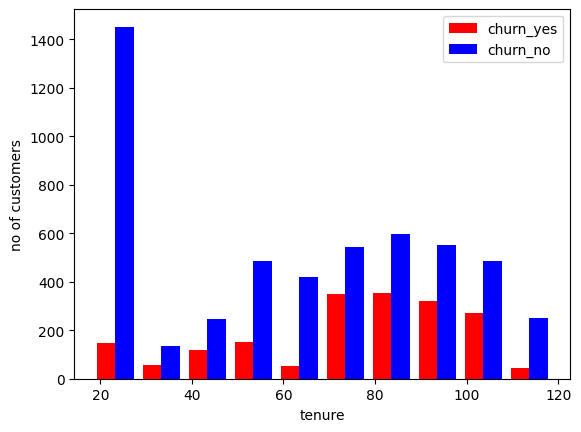

In [15]:
monthlychg_churn_yes = df[df["Churn"]=="Yes"]["MonthlyCharges"]
monthlychg_churn_no = df[df["Churn"]=="No"]["MonthlyCharges"]
plt.hist([monthlychg_churn_yes,monthlychg_churn_no],color = ["red","blue"],label=["churn_yes","churn_no"])
plt.legend()
plt.xlabel("tenure")
plt.ylabel("no of customers")

In [16]:
def type_object():
    for i in df.columns:
        if df[i].dtypes =="object":
            print(i,"===========>>>>>",df[i].unique())

type_object()

gender ===========>>>>> ['Female' 'Male']
Partner ===========>>>>> ['Yes' 'No']
Dependents ===========>>>>> ['No' 'Yes']
PhoneService ===========>>>>> ['No' 'Yes']
MultipleLines ===========>>>>> ['No phone service' 'No' 'Yes']
InternetService ===========>>>>> ['DSL' 'Fiber optic' 'No']
OnlineSecurity ===========>>>>> ['No' 'Yes' 'No internet service']
OnlineBackup ===========>>>>> ['Yes' 'No' 'No internet service']
DeviceProtection ===========>>>>> ['No' 'Yes' 'No internet service']
TechSupport ===========>>>>> ['No' 'Yes' 'No internet service']
StreamingTV ===========>>>>> ['No' 'Yes' 'No internet service']
StreamingMovies ===========>>>>> ['No' 'Yes' 'No internet service']
Contract ===========>>>>> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ===========>>>>> ['Yes' 'No']
PaymentMethod ===========>>>>> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ===========>>>>> ['No' 'Yes']


In [17]:
df.replace("No internet service","No",inplace= True)


In [18]:
df.replace("No phone service","No",inplace= True)

In [19]:
type_object()

gender ===========>>>>> ['Female' 'Male']
Partner ===========>>>>> ['Yes' 'No']
Dependents ===========>>>>> ['No' 'Yes']
PhoneService ===========>>>>> ['No' 'Yes']
MultipleLines ===========>>>>> ['No' 'Yes']
InternetService ===========>>>>> ['DSL' 'Fiber optic' 'No']
OnlineSecurity ===========>>>>> ['No' 'Yes']
OnlineBackup ===========>>>>> ['Yes' 'No']
DeviceProtection ===========>>>>> ['No' 'Yes']
TechSupport ===========>>>>> ['No' 'Yes']
StreamingTV ===========>>>>> ['No' 'Yes']
StreamingMovies ===========>>>>> ['No' 'Yes']
Contract ===========>>>>> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ===========>>>>> ['Yes' 'No']
PaymentMethod ===========>>>>> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ===========>>>>> ['No' 'Yes']


In [20]:
cols1 = ['gender','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
cols2 =['Contract','PaymentMethod','InternetService']
for i in cols1:
    encoder= LabelEncoder()
    df[i] =encoder.fit_transform(df[i])


In [21]:
df= pd.get_dummies(data=df,columns=cols2,dtype = int)

In [22]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,0,0,0,0,1,1,0,0
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,1,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,0,1,0,0,0,0,1,1,0,0
7039,0,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,0,1,0,0,1,0,0,0,1,0
7040,0,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,1,0,0,0,0,1,0,1,0,0
7041,1,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,1,0,0,0,0,0,1,0,1,0


In [23]:
cols_to_scale = ["tenure","MonthlyCharges","TotalCharges"]
scaler = StandardScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [24]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,-1.280248,0,0,0,1,0,0,0,0,1,-1.161694,-0.994194,0,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,0.064303,1,0,1,0,1,0,0,0,0,-0.260878,-0.173740,0,0,1,0,0,0,0,1,1,0,0
2,1,0,0,0,-1.239504,1,0,1,1,0,0,0,0,1,-0.363923,-0.959649,1,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0.512486,0,0,1,0,1,1,0,0,0,-0.747850,-0.195248,0,0,1,0,1,0,0,0,1,0,0
4,0,0,0,0,-1.239504,1,0,0,0,0,0,0,0,1,0.196178,-0.940457,1,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.343137,1,1,1,0,1,1,1,1,1,0.664868,-0.129180,0,0,1,0,0,0,0,1,1,0,0
7039,0,0,1,1,1.612573,1,1,0,1,1,0,1,1,1,1.276493,2.241056,0,0,1,0,0,1,0,0,0,1,0
7040,0,0,1,1,-0.872808,0,0,1,0,0,0,0,0,1,-1.170004,-0.854514,0,1,0,0,0,0,1,0,1,0,0
7041,1,1,1,0,-1.158016,1,1,0,0,0,0,0,0,1,0.319168,-0.872095,1,1,0,0,0,0,0,1,0,1,0


In [25]:
X= df.drop("Churn",axis = 1)
y = df["Churn"]

In [26]:
 X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=.2,random_state=42)

In [27]:
print(X_train.shape,'\n',X_test.shape)

(5625, 26) 
 (1407, 26)


In [48]:
model =Sequential()
model.add(Input(shape=(26,)))
model.add(Dense(26,activation="relu"))
model.add(Dense(1,activation="sigmoid"))


In [49]:
model.compile(optimizer="adam"
              ,loss="binary_crossentropy"
              ,metrics=["accuracy"])

In [50]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step - accuracy: 0.6356 - loss: 0.6120
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.7961 - loss: 0.4274
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8039 - loss: 0.4189  
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.8026 - loss: 0.4205
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.8114 - loss: 0.4052
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.8172 - loss: 0.4026
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.8153 - loss: 0.4030
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8103 - loss: 0.4127
Epoch 9/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.8008 - loss: 0.4177
Epoch 10/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8076 - loss: 0.4081
Epoch 11/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.8048 - loss: 0.4094
Epoch 12/20
176/176 ━━━━━━━━━━━━━━

In [51]:
pred =model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [52]:
y_pred=[]
for i in pred:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

    

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.65      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'truth')

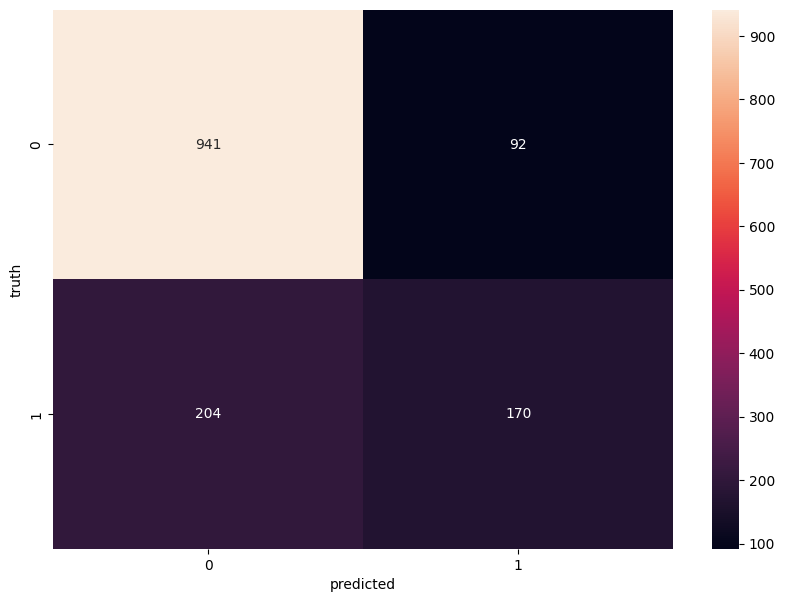

In [54]:
cm =tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("truth")